# Hand Written Digit Prediction - Classification Analysis

The digits dataset consist of 8x8 pixel images of digits. The image attribute of dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of dataset stores the digit that each image represents.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Import Data

In [2]:
from sklearn.datasets import load_digits

In [3]:
df = load_digits()

# Data Visualization

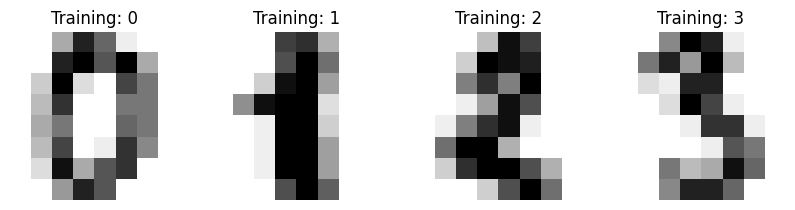

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# Data Preprocessing

In [5]:
df.images.shape

(1797, 8, 8)

In [6]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
df.images[0].shape

(8, 8)

In [8]:
len(df.images)

1797

In [9]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [10]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
data[0].shape

(64,)

In [12]:
data.shape

(1797, 64)

# Scaling Image

In [13]:
data.min()

0.0

In [14]:
data.max()

16.0

In [15]:
data = data/16

In [16]:
data.min()

0.0

In [17]:
data.max()

1.0

In [18]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(data, df.target, test_size=0.3, random_state=2529)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier()

In [24]:
rf.fit(x_train, y_train)

RandomForestClassifier()

# Predict Test Data

In [25]:
y_pred = rf.predict(x_test)

In [26]:
y_pred

array([1, 9, 4, 1, 1, 0, 6, 9, 6, 0, 0, 9, 6, 4, 5, 6, 8, 8, 8, 3, 0, 1,
       2, 0, 8, 3, 1, 1, 7, 5, 0, 4, 1, 9, 5, 5, 4, 7, 1, 5, 7, 5, 7, 3,
       3, 7, 6, 1, 9, 8, 0, 9, 7, 1, 9, 3, 4, 0, 8, 3, 0, 9, 8, 1, 5, 5,
       0, 5, 7, 9, 5, 2, 6, 8, 4, 2, 2, 2, 8, 0, 4, 2, 1, 0, 7, 5, 5, 2,
       1, 4, 9, 2, 4, 8, 2, 4, 9, 5, 4, 5, 1, 7, 1, 7, 7, 5, 2, 0, 0, 5,
       1, 5, 7, 0, 1, 1, 5, 2, 5, 6, 8, 5, 7, 1, 1, 1, 9, 6, 9, 8, 7, 8,
       7, 4, 7, 2, 9, 1, 8, 1, 2, 0, 8, 1, 2, 6, 3, 2, 3, 3, 1, 2, 1, 6,
       9, 8, 9, 1, 4, 1, 7, 4, 5, 9, 1, 0, 6, 1, 7, 8, 1, 0, 7, 2, 3, 5,
       5, 5, 1, 9, 5, 9, 5, 0, 1, 0, 3, 2, 9, 0, 8, 3, 5, 7, 3, 9, 8, 7,
       4, 1, 6, 7, 8, 2, 6, 0, 6, 0, 7, 3, 1, 6, 2, 4, 6, 8, 5, 6, 2, 6,
       5, 8, 7, 4, 2, 8, 9, 9, 3, 1, 4, 4, 7, 9, 1, 6, 3, 1, 9, 6, 4, 5,
       0, 4, 2, 9, 0, 2, 0, 3, 8, 1, 2, 9, 1, 5, 2, 7, 0, 7, 9, 6, 6, 3,
       1, 6, 3, 3, 6, 1, 1, 3, 5, 7, 8, 1, 5, 1, 0, 3, 7, 2, 7, 8, 7, 8,
       8, 3, 3, 5, 9, 5, 7, 2, 0, 7, 7, 0, 6, 4, 1,

# Model Accuracy

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [28]:
confusion_matrix(y_test,y_pred)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 64,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 58,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1, 49,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  4,  0,  1,  0,  0,  0,  1, 47,  0],
       [ 0,  0,  0,  2,  0,  2,  0,  1,  1, 47]], dtype=int64)

In [29]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      1.00      0.96        64
           2       1.00      1.00      1.00        61
           3       0.94      0.94      0.94        52
           4       1.00      1.00      1.00        54
           5       0.92      1.00      0.96        58
           6       1.00      0.94      0.97        52
           7       0.94      1.00      0.97        50
           8       0.96      0.89      0.92        53
           9       1.00      0.89      0.94        53

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# Explaination

This Jupyter Notebook code demonstrates the process of loading and analyzing the digits dataset from the sklearn library. The dataset, which
consists of images of handwritten digits, is first loaded and visualized using Matplotlib. A few sample images and their labels are displayed to give an idea of the dataset. Next, the shapes and sizes of the images and dataset are examined. The images, originally in 2D arrays of size 8x8, are reshaped into 1D arrays with 64 features to prepare them for model training.

The pixel values of the images are normalized from the range [0, 16] to [0, 1] to improve the performance of the machine learning model. After normalization, the data is split into training and testing sets using a 70-30 split. A Random Forest classifier from sklearn is then trained on the training data. Once trained, the model is used to predict the labels of the test data.

To evaluate the model's performance, various metrics are calculated. The confusion matrix provides a detailed breakdown of correct and incorrect classifications, while the accuracy score summarizes the overall correctness of the predictions. Finally, a classification report offers precision, recall, and F1-score for each digit class. This comprehensive process—from data loading and visualization to preprocessing, model training, and evaluation—provides a clear example of machine learning workflow on a classic dataset.